c:\Users\Admin\anaconda3\envs\vehicle\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Admin\anaconda3\envs\vehicle\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Admin\anaconda3\envs\vehicle\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Admin\anaconda3\envs\vehicle\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Admin\anaconda3\envs\vehicle\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess

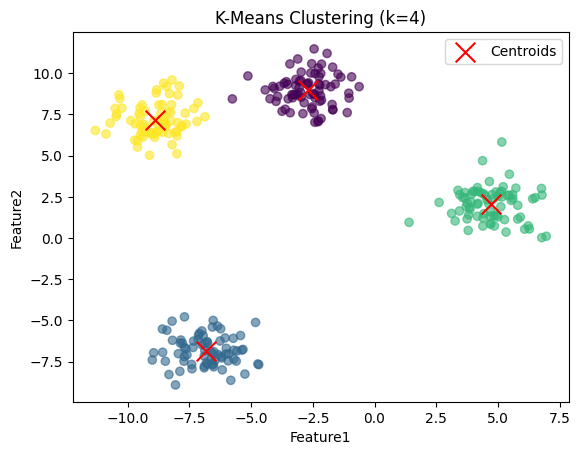

Cluster Labels: [3 3 0 1 3 1 2 1 0 2]


In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1, random_state=42)
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])

# Fit K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="viridis", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c="red", marker="x", s=200, label="Centroids")
plt.title("K-Means Clustering (k=4)")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()
plt.show()

# Cluster assignments
print("Cluster Labels:", kmeans.labels_[:10])

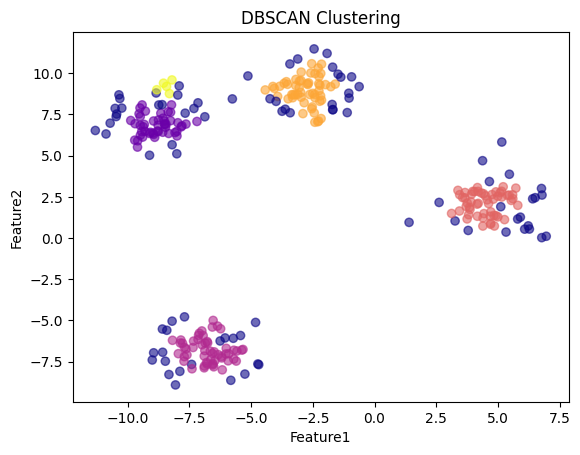

Cluster Labels (including noise): [ 0  0 -1  1 -1  1  2  1  3  2]


In [3]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap="plasma", alpha=0.6)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

# Labels: -1 indicates noise
print("Cluster Labels (including noise):", dbscan.labels_[:10])

Best parameters: {'max_depth': 4, 'min_samples_split': 2}
Accuracy: 1.00


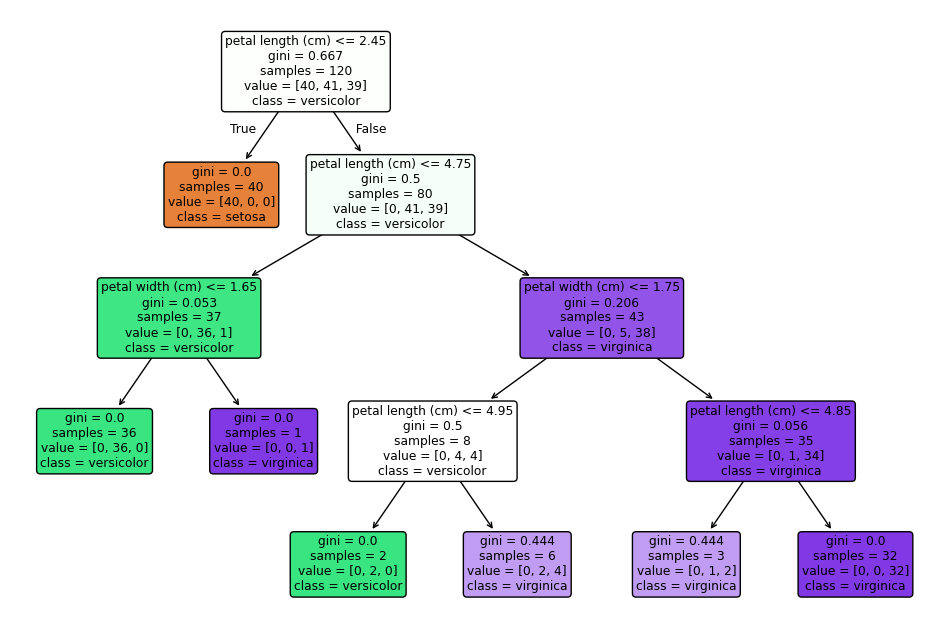

Predicted class: setosa
sepal length (cm): 0.0000
sepal width (cm): 0.0000
petal length (cm): 0.9363
petal width (cm): 0.0637


In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: species (setosa, versicolor, virginica)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for tuning
param_grid = {'max_depth': [1, 2, 3, 4, 5, None], 'min_samples_split': [2, 5, 10]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best parameters and model
best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_
print(f"Best parameters: {best_params}")

# Predict and evaluate on test set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(best_clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

# Example prediction
new_sample = [[5.0, 3.5, 1.5, 0.2]]  # Sample measurements
prediction = best_clf.predict(new_sample)
print(f"Predicted class: {iris.target_names[prediction[0]]}")

# Feature importances
importances = best_clf.feature_importances_
for feature, importance in zip(iris.feature_names, importances):
    print(f"{feature}: {importance:.4f}")


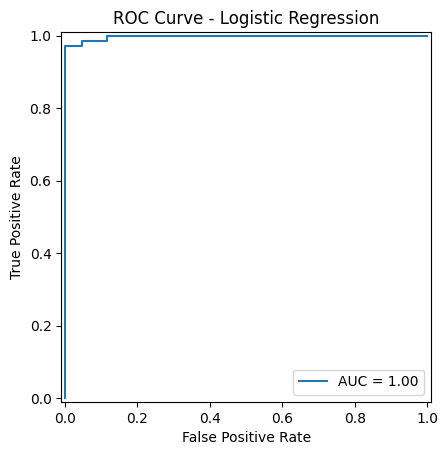

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)[:, 1]  # Probability for positive class

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
disp.plot()
plt.title("ROC Curve - Logistic Regression")
plt.show()

Underfitting - Linear Regression
Train MSE: 0.1811122787167419
Test MSE: 0.20864167502762773

Overfitting - Polynomial Regression (degree=15)
Train MSE: 0.006772892189750212
Test MSE: 0.016781249569076895

Optimal Model - Polynomial Regression (degree=2) with Ridge
Train MSE: 0.05843574097430715
Test MSE: 0.06622142814557432


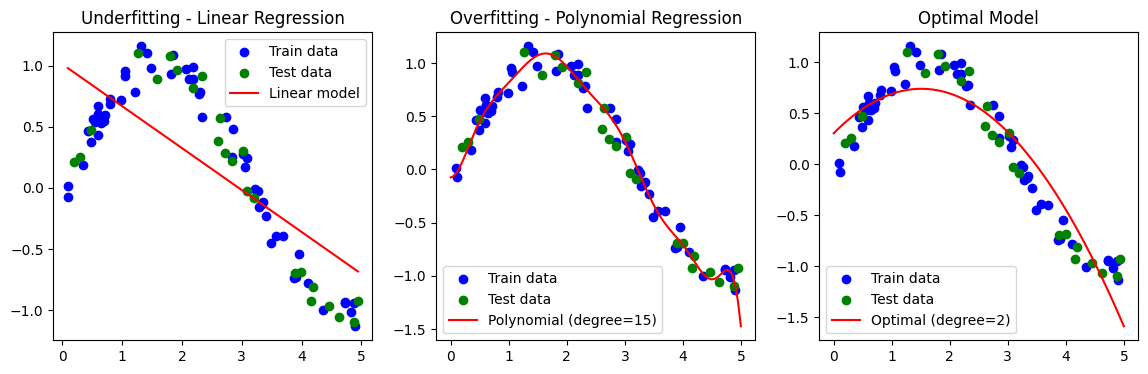

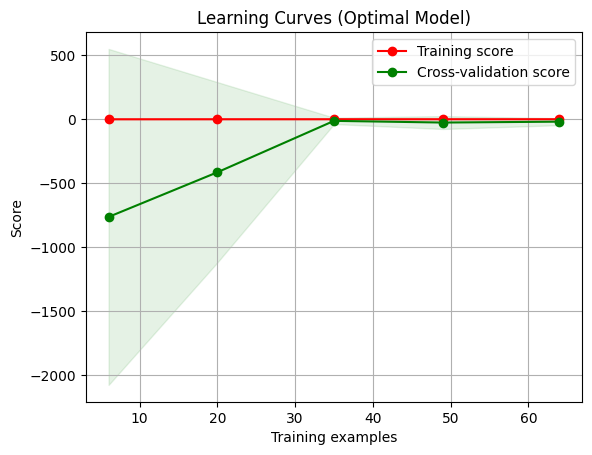

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate synthetic data (sinusoidal with noise)
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# 1. Underfitting: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_train_linear = linear_model.predict(X_train)
y_pred_test_linear = linear_model.predict(X_test)
print("Underfitting - Linear Regression")
print("Train MSE:", mean_squared_error(y_train, y_pred_train_linear))
print("Test MSE:", mean_squared_error(y_test, y_pred_test_linear))

# 2. Overfitting: High-degree polynomial regression (degree=15)
degree = 15
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_train_poly = poly_model.predict(X_train)
y_pred_test_poly = poly_model.predict(X_test)
print("\nOverfitting - Polynomial Regression (degree=15)")
print("Train MSE:", mean_squared_error(y_train, y_pred_train_poly))
print("Test MSE:", mean_squared_error(y_test, y_pred_test_poly))

# 3. Optimal Model: Polynomial regression (degree=2) with Ridge regularization
optimal_model = make_pipeline(PolynomialFeatures(2), Ridge(alpha=0.1))
optimal_model.fit(X_train, y_train)
y_pred_train_optimal = optimal_model.predict(X_train)
y_pred_test_optimal = optimal_model.predict(X_test)
print("\nOptimal Model - Polynomial Regression (degree=2) with Ridge")
print("Train MSE:", mean_squared_error(y_train, y_pred_train_optimal))
print("Test MSE:", mean_squared_error(y_test, y_pred_test_optimal))

# Plotting the results
plt.figure(figsize=(14, 4))

# Underfitting plot
plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X, linear_model.predict(X), color='red', label='Linear model')
plt.title('Underfitting - Linear Regression')
plt.legend()

# Overfitting plot
plt.subplot(1, 3, 2)
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='green', label='Test data')
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
plt.plot(X_plot, poly_model.predict(X_plot), color='red', label='Polynomial (degree=15)')
plt.title('Overfitting - Polynomial Regression')
plt.legend()

# Optimal model plot
plt.subplot(1, 3, 3)
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_plot, optimal_model.predict(X_plot), color='red', label='Optimal (degree=2)')
plt.title('Optimal Model')
plt.legend()

plt.show()

# Learning curves for the optimal model
plot_learning_curve(optimal_model, "Learning Curves (Optimal Model)", X, y, cv=5)
plt.show()

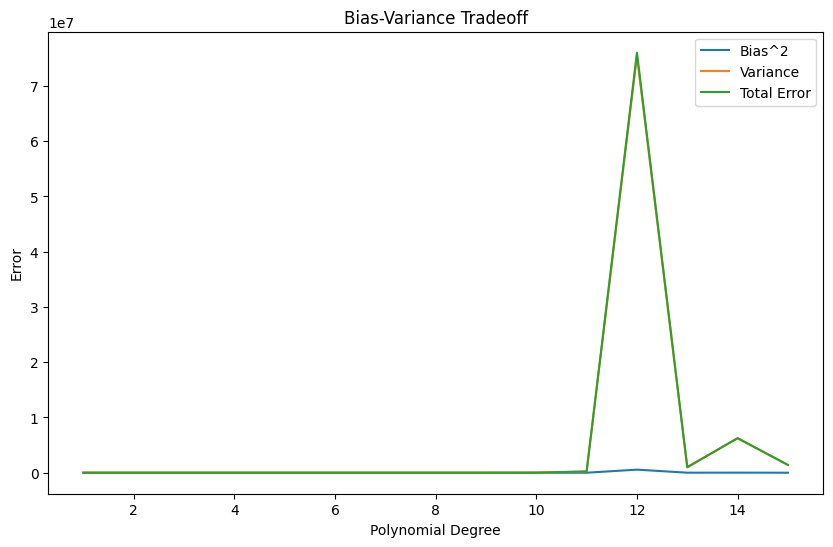

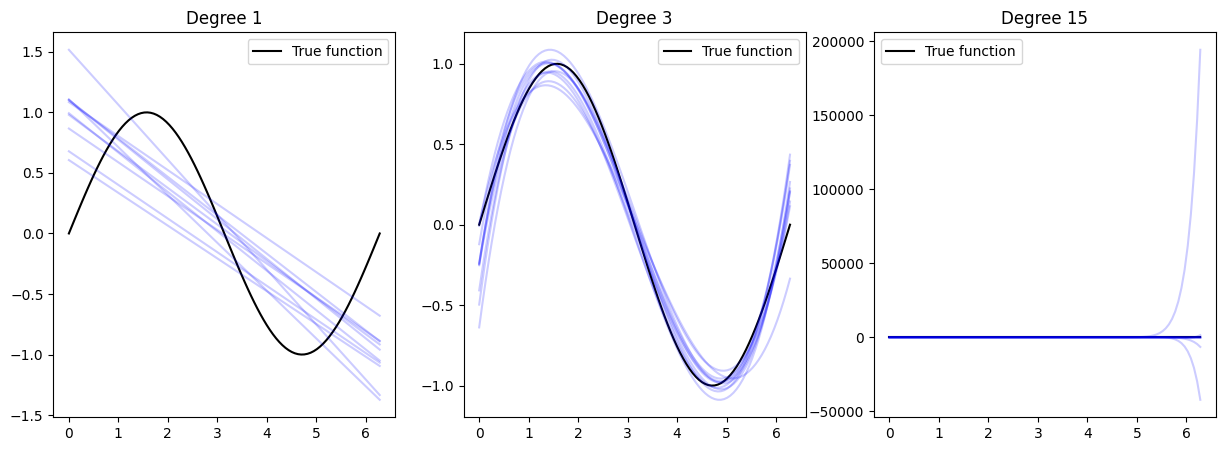

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define the true function
def true_function(x):
    return np.sin(x)

# Generate noisy training data
def generate_data(n_samples=20, noise=0.1):
    x = np.random.uniform(0, 2*np.pi, n_samples)
    y = true_function(x) + np.random.normal(0, noise, n_samples)
    return x, y

# Parameters
n_train_sets = 200  # Number of training sets to simulate
n_samples = 20      # Samples per training set
noise = 0.1         # Noise level
degrees = range(1, 16)  # Polynomial degrees to test
x_test = np.linspace(0, 2*np.pi, 100)  # Fixed test set
y_test_true = true_function(x_test)    # True function values

# Compute bias, variance, and total error for each degree
bias_squared = []
variance = []
total_error = []

for degree in degrees:
    predictions = []
    for _ in range(n_train_sets):
        x_train, y_train = generate_data(n_samples, noise)
        # Fit polynomial regression model
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(x_train[:, np.newaxis], y_train)
        y_pred = model.predict(x_test[:, np.newaxis])
        predictions.append(y_pred)
    
    predictions = np.array(predictions)  # Shape: (n_train_sets, n_test_points)
    avg_pred = np.mean(predictions, axis=0)  # Average prediction
    bias = avg_pred - y_test_true            # Bias at each test point
    bias_squared_degree = np.mean(bias**2)   # Average squared bias
    variance_degree = np.mean(np.var(predictions, axis=0))  # Average variance
    total_error_degree = np.mean((predictions - y_test_true)**2)  # Average squared error
    
    bias_squared.append(bias_squared_degree)
    variance.append(variance_degree)
    total_error.append(total_error_degree)

# Plot Bias^2, Variance, and Total Error
plt.figure(figsize=(10, 6))
plt.plot(degrees, bias_squared, label='Bias^2')
plt.plot(degrees, variance, label='Variance')
plt.plot(degrees, total_error, label='Total Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.legend()
plt.title('Bias-Variance Tradeoff')
plt.show()

# Visualize fitted models for selected degrees
degrees_to_plot = [1, 3, 15]
plt.figure(figsize=(15, 5))
for i, degree in enumerate(degrees_to_plot):
    plt.subplot(1, 3, i+1)
    plt.plot(x_test, y_test_true, label='True function', color='black')
    for _ in range(10):
        x_train, y_train = generate_data(n_samples, noise)
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(x_train[:, np.newaxis], y_train)
        y_pred = model.predict(x_test[:, np.newaxis])
        plt.plot(x_test, y_pred, color='blue', alpha=0.2)
    plt.title(f'Degree {degree}')
    plt.legend()
plt.show()

In [3]:
def equa(x):
    return 2*x +1

x = range(5)
y = [equa(x) for x in x]

x,y

(range(0, 5), [1, 3, 5, 7, 9])

In [1]:
class Test:
    def __init__(self, name, roll):
        self.name = name 
        self.roll = roll


t1 = Test("daniel", 102)
print(t1.__dict__)

{'name': 'daniel', 'roll': 102}


In [2]:
s1 = {1,2,3,4,5}
s2 = {1,2,6,7,8}
s = s1.difference(s2)
s

{3, 4, 5}